__<div align='center'><font size='10'>BOSON FACS</font></div>__

In [14]:
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
# import statsmodels.api as sm
import csv
# import pycircos
from scipy.stats import poisson
import itertools
import collections
import seaborn as sns

import FACSus as fs

# sns.set(style="whitegrid")
%cd /gpfs3/well/ansari/users/gjx698/BOSON_FACS
# %cd ..

/gpfs3/well/ansari/users/gjx698/BOSON_FACS


In [2]:
df1 = pd.read_csv('facs/Baseline/Panel1_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df2 = pd.read_csv('facs/Baseline/Panel2_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df3 = pd.read_csv('facs/Baseline/Panel3_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df4 = pd.read_csv('facs/Baseline/Panel4_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df5 = pd.read_csv('facs/Baseline/Panel5_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df1.iloc[:,1:-9] = df1.iloc[:,1:-9].apply(pd.to_numeric)
df1 = df1.drop(columns = ['Azim data.SUBJID'])
df2.iloc[:, 1:] = df2.iloc[:, 1:].apply(pd.to_numeric)
df3.iloc[:, 1:] = df3.iloc[:, 1:].apply(pd.to_numeric)
df4.iloc[:, 1:] = df4.iloc[:, 1:].apply(pd.to_numeric)
df5.iloc[:, 1:] = df5.iloc[:, 1:].apply(pd.to_numeric)

dfs = [df1, df2, df3, df4, df5]
new_dfs = [df1.copy(), df2.copy(), df3.copy(), df4.copy(), df5.copy()]
for i in range(5):
    new_columns = [dfs[i].columns[0]] + [col + '_panel' + str(i+1) for col in dfs[i].columns[1:]]
    new_dfs[i].columns = new_columns
tmp = pd.merge(new_dfs[0], new_dfs[1], on = 'Patient ID')
tmp = pd.merge(tmp, new_dfs[2], on = 'Patient ID')
tmp = pd.merge(tmp, new_dfs[3], on = 'Patient ID')
df = pd.merge(tmp, new_dfs[4], on = 'Patient ID')
df = df.dropna()
# df['Patient ID'] = 'BOSON' + df['Patient ID']

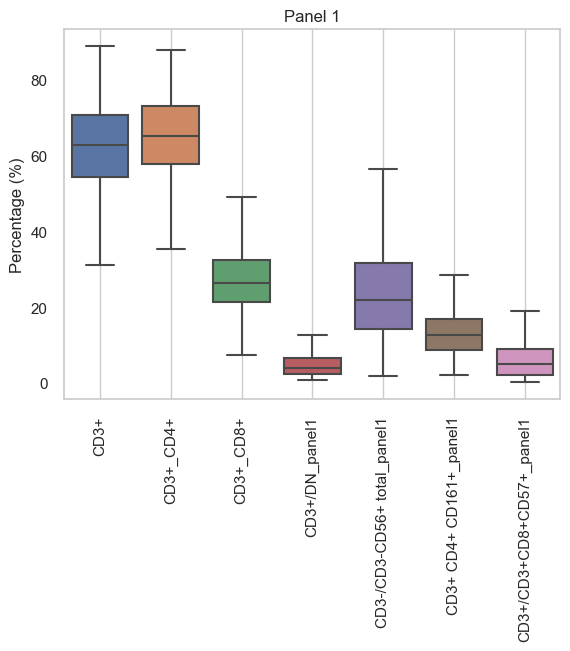

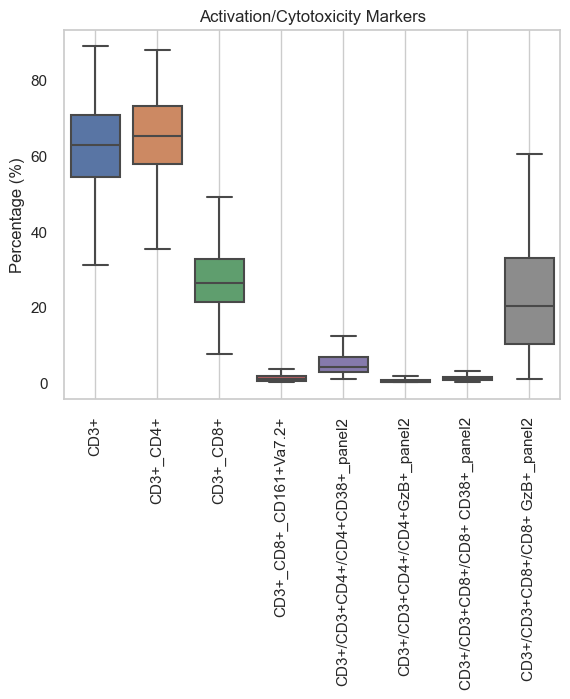

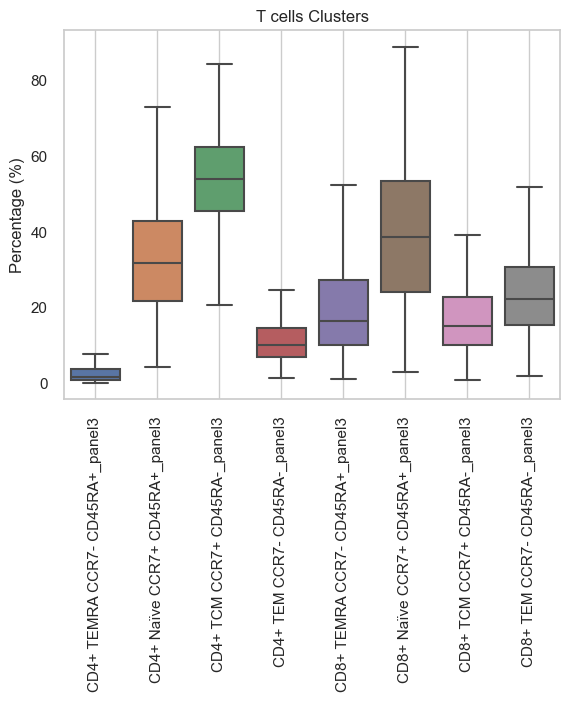

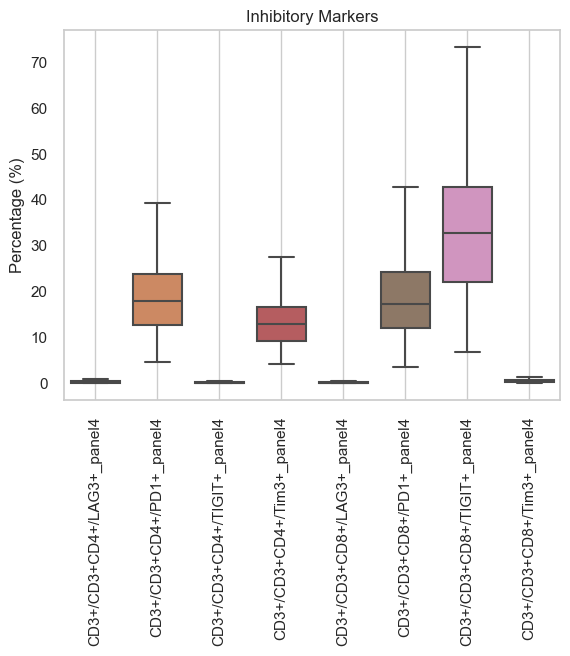

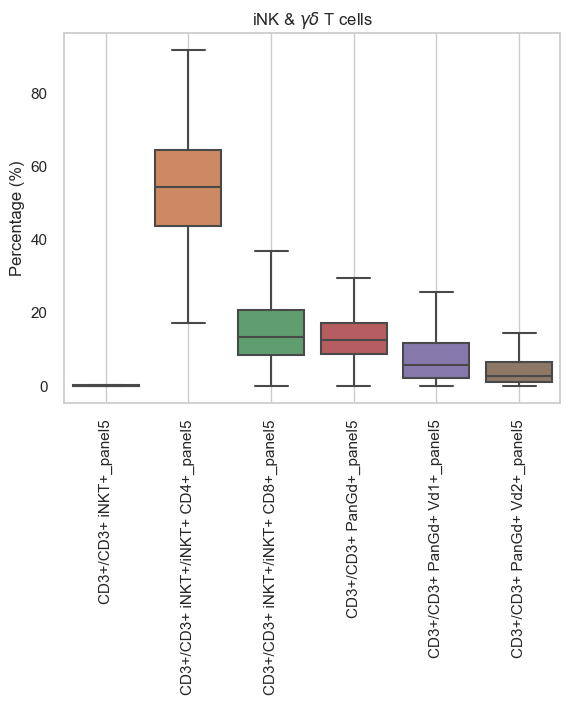

In [59]:
fs.plot_box_distribution(df[['CD3+', 'CD3+_CD4+', 'CD3+_CD8+', 'CD3+/DN_panel1', 'CD3-/CD3-CD56+ total_panel1', 
                         'CD3+ CD4+ CD161+_panel1', 'CD3+/CD3+CD8+CD57+_panel1']], 'Panel 1')
fs.plot_box_distribution(df[['CD3+', 'CD3+_CD4+', 'CD3+_CD8+', 'CD3+_CD8+_CD161+Va7.2+',
                         'CD3+/CD3+CD4+/CD4+CD38+_panel2', 'CD3+/CD3+CD4+/CD4+GzB+_panel2', 'CD3+/CD3+CD8+/CD8+ CD38+_panel2',
                         'CD3+/CD3+CD8+/CD8+ GzB+_panel2']], 'Activation/Cytotoxicity Markers')
fs.plot_box_distribution(df[['CD4+ TEMRA CCR7- CD45RA+_panel3','CD4+ Naïve CCR7+ CD45RA+_panel3',
                          'CD4+ TCM CCR7+ CD45RA-_panel3','CD4+ TEM CCR7- CD45RA-_panel3',
                          'CD8+ TEMRA CCR7- CD45RA+_panel3','CD8+ Naïve CCR7+ CD45RA+_panel3',
                          'CD8+ TCM CCR7+ CD45RA-_panel3','CD8+ TEM CCR7- CD45RA-_panel3']], 'T cells Clusters')
fs.plot_box_distribution(df[[ 'CD3+/CD3+CD4+/LAG3+_panel4', 'CD3+/CD3+CD4+/PD1+_panel4',
                          'CD3+/CD3+CD4+/TIGIT+_panel4', 'CD3+/CD3+CD4+/Tim3+_panel4',
                          'CD3+/CD3+CD8+/LAG3+_panel4', 'CD3+/CD3+CD8+/PD1+_panel4',
                          'CD3+/CD3+CD8+/TIGIT+_panel4', 'CD3+/CD3+CD8+/Tim3+_panel4']], 'Inhibitory Markers')
fs.plot_box_distribution(df[['CD3+/CD3+ iNKT+_panel5',
                          'CD3+/CD3+ iNKT+/iNKT+ CD4+_panel5',
                          'CD3+/CD3+ iNKT+/iNKT+ CD8+_panel5',
                          'CD3+/CD3+ PanGd+_panel5',
                          'CD3+/CD3+ PanGd+ Vd1+_panel5',
                          'CD3+/CD3+ PanGd+ Vd2+_panel5']], 'iNK & $\gamma\delta$ T cells')